In [ ]:
import pandas as pd

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
df= pd.read_csv(nome_do_arquivo)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
df.shape

(17379, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
print('proporção valores nulo "temp"')
print(round((df.isnull().sum()['temp']/len(df))*100,2), '%')

proporção valores nulo "temp"
10.0 %


In [ ]:
#apagando dados nulos da coluna dteday
col = ['dteday']
df.dropna(subset=col, inplace=True)

In [ ]:
df.shape

(15641, 17)

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df['temp'].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [ ]:
df['windspeed'].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [ ]:
df.season.unique()

array([ 1., nan,  2.,  3.,  4.])

In [ ]:
df['season']=pd.Categorical(df['season'])
df.dtypes

instant        float64
dteday          object
season        category
yr             float64
mnth           float64
hr             float64
holiday        float64
weekday        float64
workingday     float64
weathersit     float64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered     float64
cnt            float64
dtype: object

In [ ]:
df['season'] = df['season'].cat.codes
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


In [ ]:
df.season.unique()

array([ 0, -1,  1,  2,  3], dtype=int8)

In [ ]:
df.shape

(15641, 17)

In [ ]:
df.dteday = pd.to_datetime(df.dteday)

In [ ]:
df.dtypes

instant              float64
dteday        datetime64[ns]
season                  int8
yr                   float64
mnth                 float64
hr                   float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [ ]:
print('Min:', min(df.dteday))
print('Max:', max(df.dteday))

Min: 2011-01-01 00:00:00
Max: 2012-12-31 00:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.


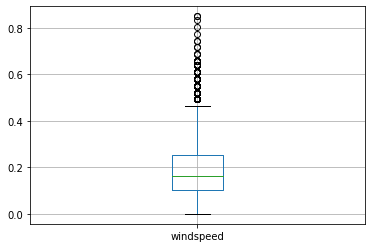

In [ ]:
#realizando o boxplot 
df.boxplot(['windspeed'])
print('Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.')

In [ ]:
 cols = ["season", "temp", "atemp", "hum", "windspeed", "cnt"]

"hum" e "cnt" -0.32 / Possuem baixa correlação linear negativa.


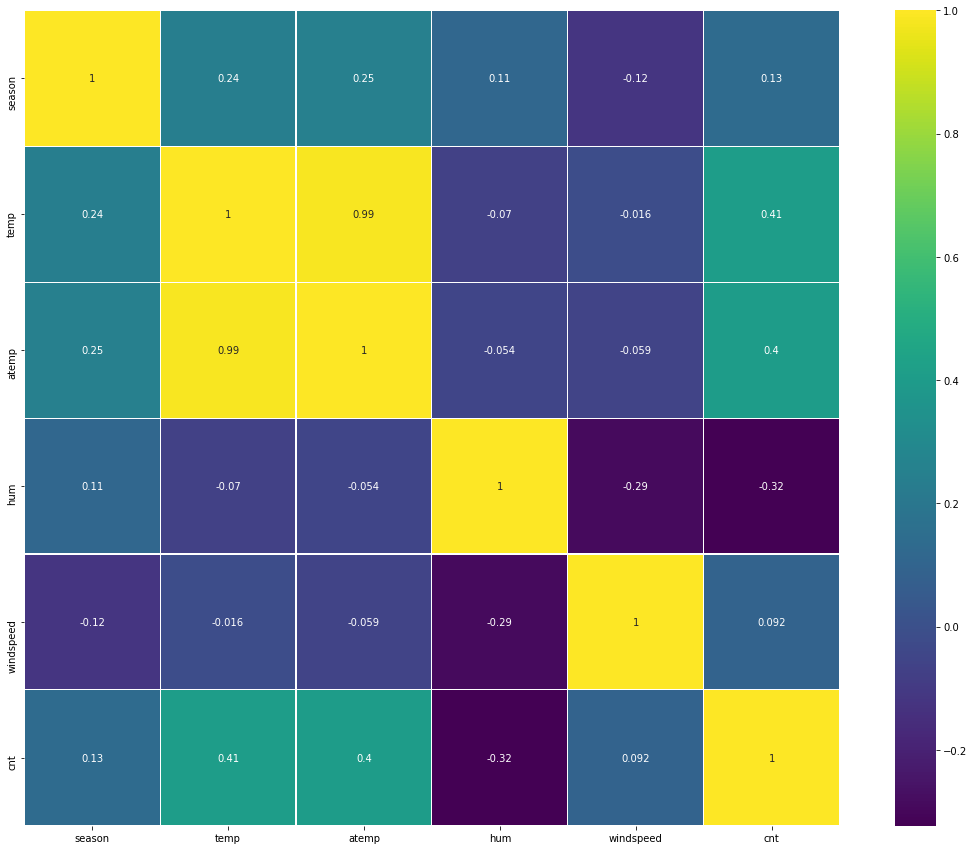

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

#Cortando variáveis altamente correlacionadas => Correlação acima de 0.7 sai
f, ax = plt.subplots(figsize=(20, 15))

corr = df[cols].corr()
#corr = corr[(corr>=0.4) | (corr <= -0.4)]

sns.heatmap(corr,
            cmap='viridis',
            linewidths = 0.1,
            #vmax=1.0, vmin= 0,
           annot = True, annot_kws={'size': 10}, square = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

print('"hum" e "cnt" -0.32 / Possuem baixa correlação linear negativa.')

In [ ]:
#substituindo os valores nulos pela média da coluna
df["hum"].fillna(df["hum"].mean(), inplace=True) 
df["cnt"].fillna(df["cnt"].mean(), inplace=True)
df["casual"].fillna(df["casual"].mean(), inplace=True)

In [ ]:
independentes = ["hum", "casual"]
x= df[independentes].values
y= df['cnt'].values #variável dependente

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict
#x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
regressao= reg.fit (x,y) # encontra os coeficientes (realiza a regressão)

In [ ]:
previsao=reg.predict(x)

In [ ]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197]X 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
tree = model_tree.fit(x,y)

In [ ]:
previsao_tree =model_tree.predict(x)

In [ ]:
R_2 = r2_score(y, previsao_tree)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7098339715834964
